In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_csv("/Users/inutenneti/Desktop/Spring Quarter/Deep Learning/Project/full_train.csv")
val_data = pd.read_csv("/Users/inutenneti/Desktop/Spring Quarter/Deep Learning/Project/full_val.csv")

In [3]:
# Display basic information and the first few rows of each dataset
train_info = train_data.info()
val_info = val_data.info()
train_head = train_data.head()
val_head = val_data.head()

train_info, val_info, train_head, val_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  590 non-null    int64  
 1   image_path  590 non-null    object 
 2   label_x     590 non-null    float64
 3   label_y     590 non-null    float64
 4   label_w     590 non-null    float64
 5   label_h     590 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 27.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  418 non-null    int64  
 1   image_path  418 non-null    object 
 2   label_x     418 non-null    float64
 3   label_y     418 non-null    float64
 4   label_w     418 non-null    float64
 5   label_h     418 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.7+ KB


(None,
 None,
    Unnamed: 0                                         image_path   label_x  \
 0           0  data_objectdetection/1/dl_project.v1i.yolov8/t...  0.391406   
 1           1  data_objectdetection/1/dl_project.v1i.yolov8/t...  0.409375   
 2           2  data_objectdetection/1/dl_project.v1i.yolov8/t...  0.621875   
 3           3  data_objectdetection/1/dl_project.v1i.yolov8/t...  0.667188   
 4           4  data_objectdetection/1/dl_project.v1i.yolov8/t...  0.421875   
 
     label_y   label_w   label_h  
 0  0.336719  0.509375  0.165625  
 1  0.326562  0.500000  0.113281  
 2  0.228906  0.223438  0.160938  
 3  0.254688  0.245312  0.195312  
 4  0.320312  0.506250  0.148438  ,
    Unnamed: 0                                         image_path   label_x  \
 0           0  data_objectdetection/3/dl_images.v1i.yolov8/tr...  0.484375   
 1           1  data_objectdetection/3/dl_images.v1i.yolov8/tr...  0.482031   
 2           2  data_objectdetection/3/dl_images.v1i.yolov8/tr

In [4]:
# Descriptive statistics for the training and validation datasets
train_stats = train_data.describe()
val_stats = val_data.describe()

train_stats, val_stats

(       Unnamed: 0     label_x     label_y     label_w     label_h
 count  590.000000  590.000000  590.000000  590.000000  590.000000
 mean   294.500000    0.535052    0.276574    0.239621    0.168471
 std    170.462606    0.103305    0.056759    0.124930    0.050532
 min      0.000000    0.341406    0.121875    0.107813    0.068750
 25%    147.250000    0.462500    0.237500    0.138477    0.131250
 50%    294.500000    0.533984    0.272266    0.185938    0.160938
 75%    441.750000    0.581055    0.332813    0.283594    0.193750
 max    589.000000    0.829688    0.375000    0.520312    0.356250,
        Unnamed: 0     label_x     label_y     label_w     label_h
 count  418.000000  418.000000  418.000000  418.000000  418.000000
 mean   208.500000    0.520516    0.454904    0.364967    0.116105
 std    120.810458    0.097212    0.090612    0.095365    0.041718
 min      0.000000    0.439844    0.214844    0.115625    0.040625
 25%    104.250000    0.466406    0.385352    0.339062    0.0

Analysis

Count: Both datasets have complete data for all variables with no missing values; 590 entries for the training dataset and 418 for the validation dataset.

Mean: The average values for label_x (center x-coordinate of bounding box) and label_y (center y-coordinate of bounding box) are around 0.5 in both datasets, which suggests that, on average, the bounding boxes are centered in the middle of the image horizontally. However, there's a notable difference in the vertical centering (label_y) between the two datasets.

Standard Deviation: There is a significant amount of variability in the width (label_w) and height (label_h) of bounding boxes in both datasets. This variability indicates diverse sizes of the objects being detected across images.

Percentiles and Range (Min/Max): The range and quartiles provide insight into the distribution of values. For example, the minimum and maximum values show the extremities of bounding box dimensions, which are critical for understanding the scale of objects within the images. The wide range in label_w and label_h suggests a variety of object sizes.

/Users/inutenneti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/inutenneti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/inutenneti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/inutenneti/anaconda3/lib/python3.11/site-packages/seaborn/_

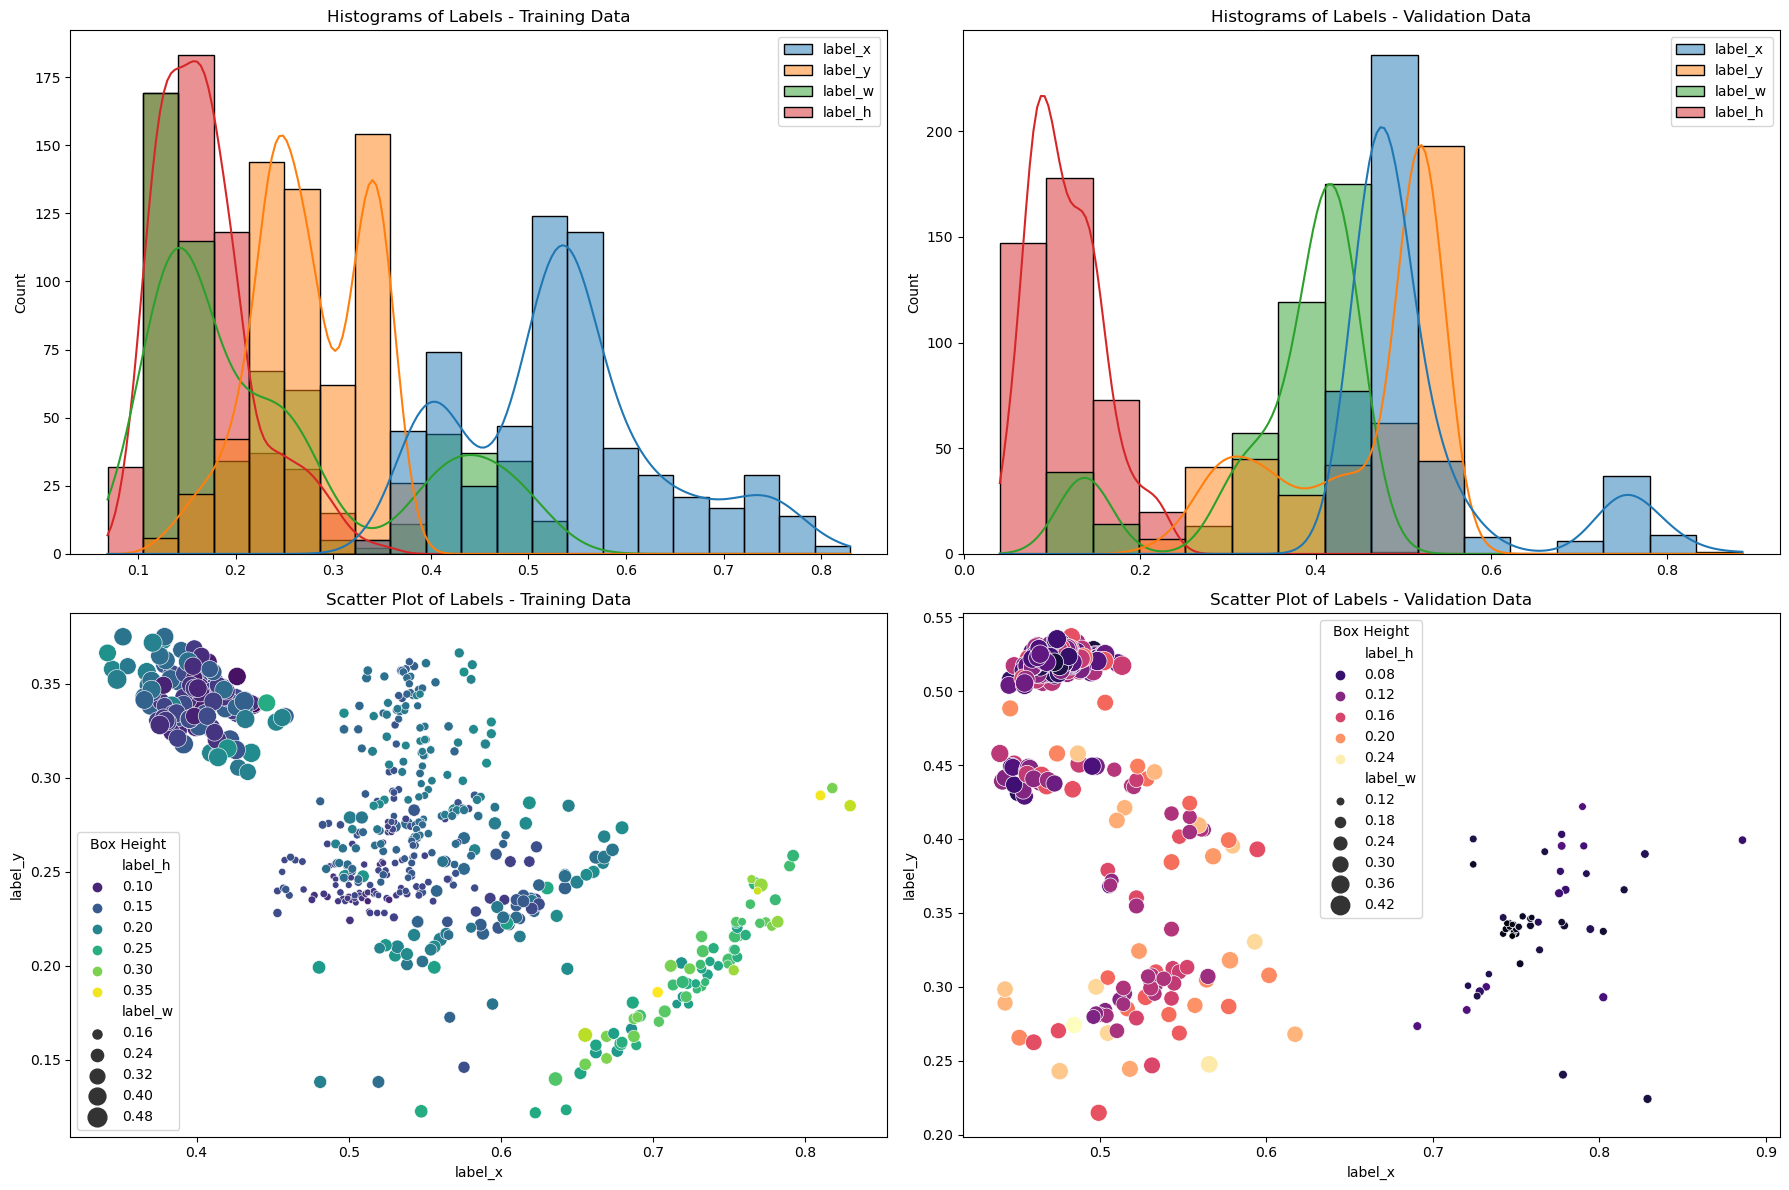

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Histograms for training data
plt.subplot(2, 2, 1)
sns.histplot(train_data[['label_x', 'label_y', 'label_w', 'label_h']], kde=True)
plt.title('Histograms of Labels - Training Data')

# Histograms for validation data
plt.subplot(2, 2, 2)
sns.histplot(val_data[['label_x', 'label_y', 'label_w', 'label_h']], kde=True)
plt.title('Histograms of Labels - Validation Data')

# Scatter plot for training data
plt.subplot(2, 2, 3)
sns.scatterplot(x='label_x', y='label_y', size='label_w', sizes=(20, 200), hue='label_h', palette="viridis", data=train_data)
plt.title('Scatter Plot of Labels - Training Data')
plt.legend(title='Box Height')

# Scatter plot for validation data
plt.subplot(2, 2, 4)
sns.scatterplot(x='label_x', y='label_y', size='label_w', sizes=(20, 200), hue='label_h', palette="magma", data=val_data)
plt.title('Scatter Plot of Labels - Validation Data')
plt.legend(title='Box Height')

plt.tight_layout()
plt.show()


Histograms

Training Data: The histograms show a broad spread in the x and y coordinates, with some concentration around the center, indicating a common placement of objects in the center of images. Width and height show a right-skewed distribution, suggesting many smaller objects with fewer larger ones.

Validation Data: Similar patterns to the training data, with a noticeable peak in the x-coordinate around the middle. The distributions for width and height remain skewed, indicating consistency with the training dataset in terms of object size distribution.

Scatter Plots

Training Data: Points in the scatter plot are colored and sized by height and width, indicating variation in object size across different x and y coordinates. The plot shows a wide distribution of objects across the plane, with no clear pattern of size depending on location, suggesting a random placement of objects of various sizes.

Validation Data: Follows a similar pattern to the training data, reinforcing the consistency across datasets. The spread of x and y values with the corresponding sizes suggests a diverse set of images and object placements, which is good for training robust models.